In [38]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,10)

In [220]:
page = requests.get('http://193.246.68.117:8080/gp/GP?type=EXPORT&indikatoren=373&raumtyp=1&text=yes')

In [221]:
zuri_json = page.json()

In [222]:
zuri_json.keys()

dict_keys(['RAUM', 'INDIKATOR'])

In [223]:
raum_json = zuri_json['RAUM']

In [224]:
indi_json = zuri_json['INDIKATOR']

In [225]:
raum_df = pd.io.json.json_normalize(raum_json)

In [226]:
raum_df.head()

,ALLE_JAHRE,ALLE_WERTE.1984,ALLE_WERTE.1985,ALLE_WERTE.1986,ALLE_WERTE.1987,ALLE_WERTE.1988,ALLE_WERTE.1989,ALLE_WERTE.1990,ALLE_WERTE.1991,ALLE_WERTE.1992,...,ALLE_WERTE.2013,ALLE_WERTE.2014,ALLE_WERTE.2015,ALLE_WERTE.2016,ALLE_WERTE.2017,ALLE_WERTE.2018,BFS,DATEN_VORHANDEN,RAUMEINHEIT_ID,RAUMEINHEIT_NAME
0,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201...",1.49,3.62,2.67,2.60,1.27,0.61,0.00,2.30,2.79,...,1.69,0.82,2.30,0.72,1.79,0.34,21,TRUE,15,Adlikon
1,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201...",0.10,0.28,0.00,0.29,0.08,0.00,0.00,0.03,0.49,...,0.89,0.44,0.77,0.65,0.86,0.90,131,TRUE,94,Adliswil
2,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201...",0.63,0.00,3.70,0.00,0.00,0.00,0.00,0.00,0.00,...,1.17,1.09,1.08,6.12,0.83,4.38,241,TRUE,160,Aesch ZH
3,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201...",0.64,0.32,0.31,0.00,0.30,0.00,0.00,0.64,1.06,...,0.47,1.60,2.05,2.15,2.60,1.55,1,TRUE,1,Aeugst a.A.
4,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201...",0.67,0.64,0.37,0.11,0.27,0.13,0.08,0.08,0.16,...,0.42,0.59,0.82,0.77,1.21,1.46,2,TRUE,2,Affoltern a.A.


In [41]:
raum_df.columns = list(map(lambda x: x.replace('ALLE_WERTE.', '_'),raum_df.columns))

In [191]:
raum_dates = raum_df.drop(['BFS', 'DATEN_VORHANDEN', 'ALLE_JAHRE', 'RAUMEINHEIT_ID', 'RAUMEINHEIT_NAME'], axis=1).astype(float)
raum_dates.columns = raum_df.ALLE_JAHRE[0]
raum_dates.index = raum_df.RAUMEINHEIT_NAME

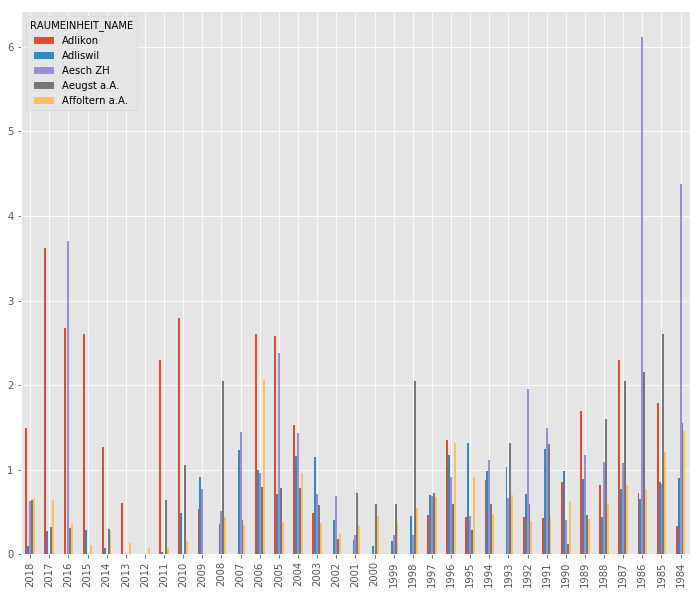

In [218]:
raum_dates.head().T.plot.bar()
None

---

In [183]:
def gemeinde_by_date(raum_df_, gemeinde):
    df = raum_df[raum_df.RAUMEINHEIT_NAME == gemeinde]
    ix = df.index[0]
    years = df.ALLE_JAHRE.values[0]
    df = df.drop(['BFS', 'DATEN_VORHANDEN', 'ALLE_JAHRE', 'RAUMEINHEIT_ID','RAUMEINHEIT_NAME'], axis=1).astype(float)
    df.columns = years
    return pd.DataFrame(df.stack()[ix], columns=[gemeinde])

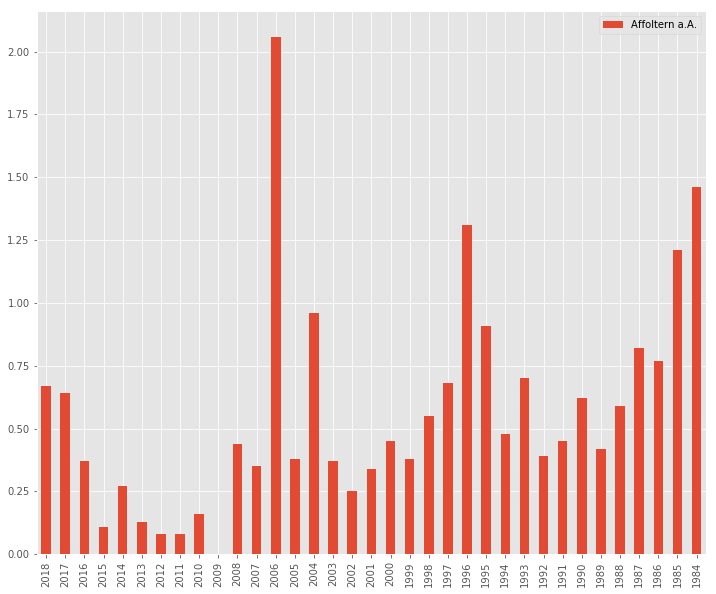

In [184]:
gemeinde_by_date(raum_df, 'Affoltern a.A.').plot.bar()
None

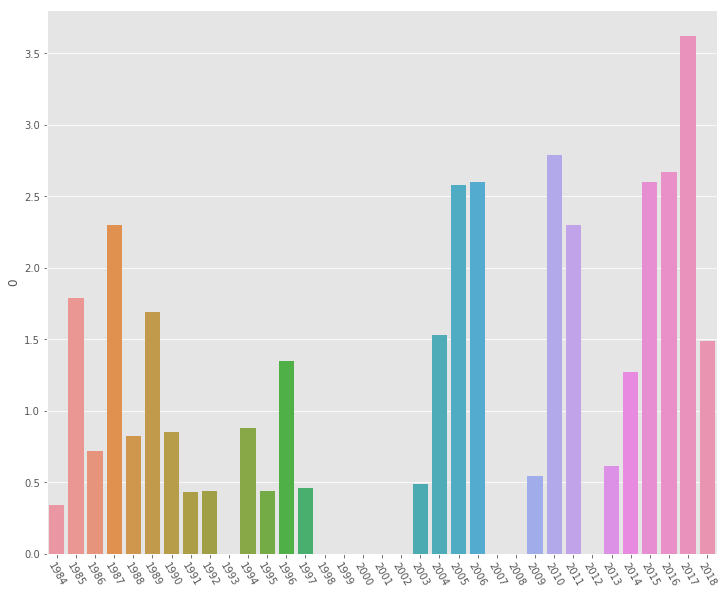

In [70]:
g = sns.barplot(raum_df.ALLE_JAHRE[0], raum_dates.iloc[0],label=raum_df.iloc[0].RAUMEINHEIT_NAME)
locs, labels = plt.xticks()
plt.xticks(locs, labels, rotation=-60)
None

---

In [31]:
indi_df = pd.io.json.json_normalize(indi_json)

In [206]:
indi_df.INDIKATOR_DESC.values

array(['Leerstehende Wohnungen am 1. Juni des Erhebungsjahres, gemessen am Wohnungsbestand Ende Vorjahr'],
      dtype=object)